# Data Exploration

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.inspection
pd.set_option('display.max_columns', 139)
plt.style.use('ggplot')

In [146]:
df = pd.read_parquet('accumulated_weekend_data_2023_02_27.parquet')
df = df.drop(df[df['run_id'] < 5.0].index) # Keep runs 5 and above
df

,unix_epoch_milliseconds_mean,unix_epoch_milliseconds_std,g28_fw_mean,g28_fw_std,k18_fw_mean,k18_fw_std,k18_ref_mean,k18_ref_std,LHe_psi_mean,LHe_psi_std,LHe_level_percent_mean,LHe_level_percent_std,cryo_vac_torr_mean,cryo_vac_torr_std,four_k_heater_power_mean,four_k_heater_power_std,four_k_cold_mass_mean,four_k_cold_mass_std,four_k_cryo_e_mean,four_k_cryo_e_std,four_k_cryo_w_mean,four_k_cryo_w_std,four_k_cryo_ne_mean,four_k_cryo_ne_std,four_k_cryo_nw_mean,four_k_cryo_nw_std,four_k_heat_cond_mean,four_k_heat_cond_std,four_k_i_feedthrough_mean,four_k_i_feedthrough_std,four_k_heater_k_mean,four_k_heater_k_std,fifty_k_cond_bar_mean,fifty_k_cond_bar_std,fifty_k_cond_bar_ne_mean,fifty_k_cond_bar_ne_std,fifty_k_cond_bar_nw_mean,fifty_k_cond_bar_nw_std,fifty_k_shield_bot_mean,fifty_k_shield_bot_std,bottom_ln_vessel_mean,bottom_ln_vessel_std,seventy_k_cond_bar_mean,seventy_k_cond_bar_std,inj_mbar_mean,inj_mbar_std,ext_mbar_mean,ext_mbar_std,bl_mig2_torr_mean,bl_mig2_torr_std,robin_i_mean,robin_i_std,glaser_1_mean,glaser_1_std,ht_oven_v_mean,ht_oven_v_std,ht_oven_i_mean,ht_oven_i_std,x_ray_source_mean,x_ray_source_std,x_ray_exit_mean,x_ray_exit_std,bias_v_mean,bias_v_std,bias_i_mean,bias_i_std,gas_name_1_mean,gas_name_1_std,gas_name_2_mean,gas_name_2_std,gas_name_5_mean,gas_name_5_std,gas_name_6_mean,gas_name_6_std,gas_name_7_mean,gas_name_7_std,puller_v_mean,puller_v_std,puller_i_mean,puller_i_std,puller_raw_gap_mean,puller_raw_gap_std,extraction_v_mean,extraction_v_std,extraction_i_mean,extraction_i_std,lt_oven_1_sp_mean,lt_oven_1_sp_std,lt_oven_2_sp_mean,lt_oven_2_sp_std,lt_oven_1_temp_mean,lt_oven_1_temp_std,lt_oven_2_temp_mean,lt_oven_2_temp_std,m_over_q_mean,m_over_q_std,fcv1_i_mean,fcv1_i_std,batman_i_mean,batman_i_std,inj_i_mean,inj_i_std,ext_i_mean,ext_i_std,mid_i_mean,mid_i_std,sext_i_mean,sext_i_std,inj_v_mean,inj_v_std,ext_v_mean,ext_v_std,mid_v_mean,mid_v_std,sext_v_mean,sext_v_std,inj_ps_v_mean,inj_ps_v_std,ext_ps_v_mean,ext_ps_v_std,mid_ps_v_mean,mid_ps_v_std,sext_ps_v_mean,sext_ps_v_std,gas_balzer_1_mean,gas_balzer_1_std,gas_balzer_2_mean,gas_balzer_2_std,gas_balzer_5_mean,gas_balzer_5_std,gas_balzer_6_mean,gas_balzer_6_std,gas_balzer_7_mean,gas_balzer_7_std,time_mean,time_std,run_id,start_time,stop_time
2490,1.662167e+12,11262.835274,4300.051282,6.831108,1418.871795,2.065336,35.256410,0.436651,15.320880,0.003749,37.066776,0.067711,2.433820e-07,5.293956e-23,1.803058,0.038769,4.738000,0.000000,4.113539,0.002205,3.605,0.0,4.097128,0.004363,4.031103,0.069110,4.245000,0.000000,4.811077,0.000266,5.346000,0.001679,30.914846,0.008475,32.519666,0.006137,3.190410,5.908896,68.135792,0.012351,65.329075,0.037074,65.809846,0.034528,1.631546e-07,1.726166e-10,7.560434e-09,2.377274e-11,6.141178e-08,1.367048e-10,60.905041,0.000000,-0.045783,0.009840,0.004223,0.000000,0.461009,0.003785,144.266670,0.697734,4.800000,0.000000,30.367090,0.083356,7.752190,0.036032,3.0,0.0,1.0,0.0,7.0,0.0,6.0,0.0,8.0,0.0,2.008908,0.000310,0.001428,0.000884,45.079556,0.000000,19.990899,0.000511,5.452481,0.016727,30.0,0.0,30.0,0.0,0.358139,0.005915,0.062561,0.000000,2.286535,0.001247,0.000408,2.433364e-06,68.193619,0.000000,184.997203,0.007221,137.012660,0.002482,152.987621,0.002076,429.999586,0.005237,0.090571,0.007522,0.079827,0.002349,0.070571,0.002106,0.137099,0.005218,0.907804,0.007430,0.728008,0.002326,0.616781,0.002134,0.954684,0.005320,0.450453,0.0,13.976722,0.000989,0.417888,0.002526,0.469222,0.0,0.475478,0.000000,1.662167e+09,11.262835,5.0,1.662167e+09,1.662167e+09
2491,1.662167e+12,11265.036251,4302.743590,9.234045,1418.897436,2.193170,35.076923,0.615385,15.320980,0.003365,37.093807,0.042494,2.433820e-07,5.293956e-23,1.832353,0.006832,4.737231,0.000421,4.113821,0.002510,3.605,0.0,4.097795,0.004268,4.028333,0.068745,4.245000,0.000000,4.811154,0.000361,5.348180,0.001906,30.942385,0.008472,32.489771,0.003898,2.689205,5.052175,68.126869,0.010850,65.439078,0.043140,65.920848,0.025340,1.799325e-07,2.877134e-10,7.158425e-09,8.280186e-11,5.543280e-08,6.617445

![run_info](run_info.png)

# Key Features
fcv1_i, bias_v, bias_i, inj_mbar, run_id (start_time, stop_time)?

In [147]:
rows = ["run_id", "fcv1_i_mean", "bias_v_mean", "bias_i_mean", "inj_mbar_mean", "start_time", "stop_time"]
features = rows[1:5]

In [148]:
tiny_df = df[rows]
tiny_df

,run_id,fcv1_i_mean,bias_v_mean,bias_i_mean,inj_mbar_mean,start_time,stop_time
2490,5.0,0.000408,30.367090,7.752190,1.631546e-07,1.662167e+09,1.662167e+09
2491,5.0,0.000182,11.886959,0.191699,1.799325e-07,1.662167e+09,1.662168e+09
2492,5.0,0.000416,84.668518,7.286177,1.477675e-07,1.662168e+09,1.662168e+09
2493,5.0,0.000357,84.572268,5.439768,1.352869e-07,1.662168e+09,1.662168e+09
2494,5.0,0.000196,84.459976,4.143592,1.118232e-07,1.662169e+09,1.662169e+09
...,...,...,...,...,...,...,...
12939,10.0,0.000131,23.749855,10.338125,1.779659e-07,1.672848e+09,1.672848e+09
12940,10.0,0.000433,64.127014,15.736986,1.440222e-07,1.672848e+09,1.672848e+09
12941,10.0,0.000136,24.086733,10.366198,1.768910e-07,1.672848e+09,1.672848e+09
12942,10.0,0.000074,12.825403,3.896548,1.875515e-07,1.672848e+09,1.672848e+09


### Plotting beam current against key features, just looking at patterns

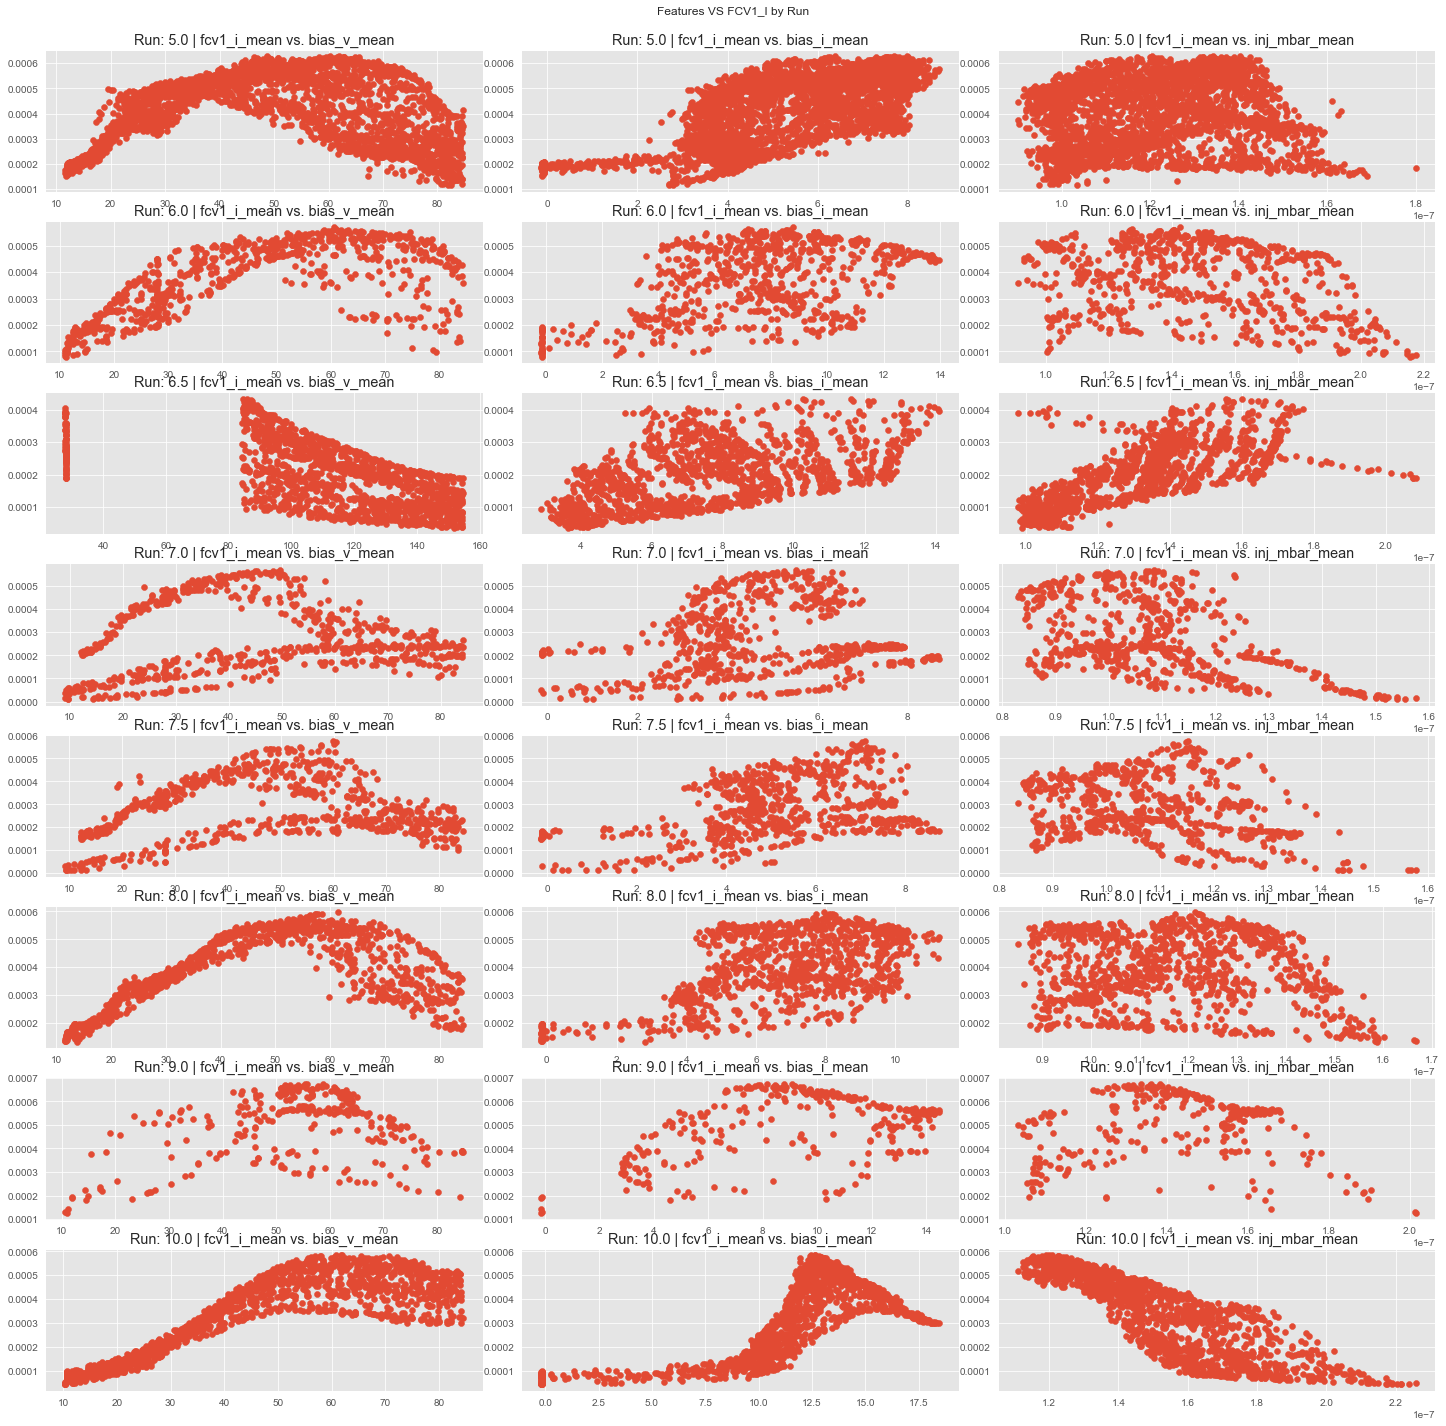

In [149]:
fig, axes= plt.subplots(8, 3, figsize=(20, 20))
fig.tight_layout()
for run_num, run in enumerate(tiny_df['run_id'].unique()):
    run_data = tiny_df[tiny_df['run_id'] == run]
    for i, feature in enumerate(features[1:]):
        x = run_data[feature]
        y = run_data['fcv1_i_mean']
        axes[run_num, i].scatter(x, y)
        axes[run_num, i].title.set_text(f"Run: {run} | fcv1_i_mean vs. {feature}")
fig.suptitle("Features VS FCV1_I by Run")
fig.subplots_adjust(top=0.95)
plt.show()

In [150]:
df['run_id'].value_counts()

5.0     3556
10.0    1637
6.5     1536
8.0     1181
6.0      774
7.5      748
7.0      713
9.0      309
Name: run_id, dtype: int64

Run 5 and Run 10 give the clearest pattern, probably due to having longer run length, although 10 is significantly less noisy than 6.5 which has a similar run length to 10.

### Key Features and Output Current over Runs

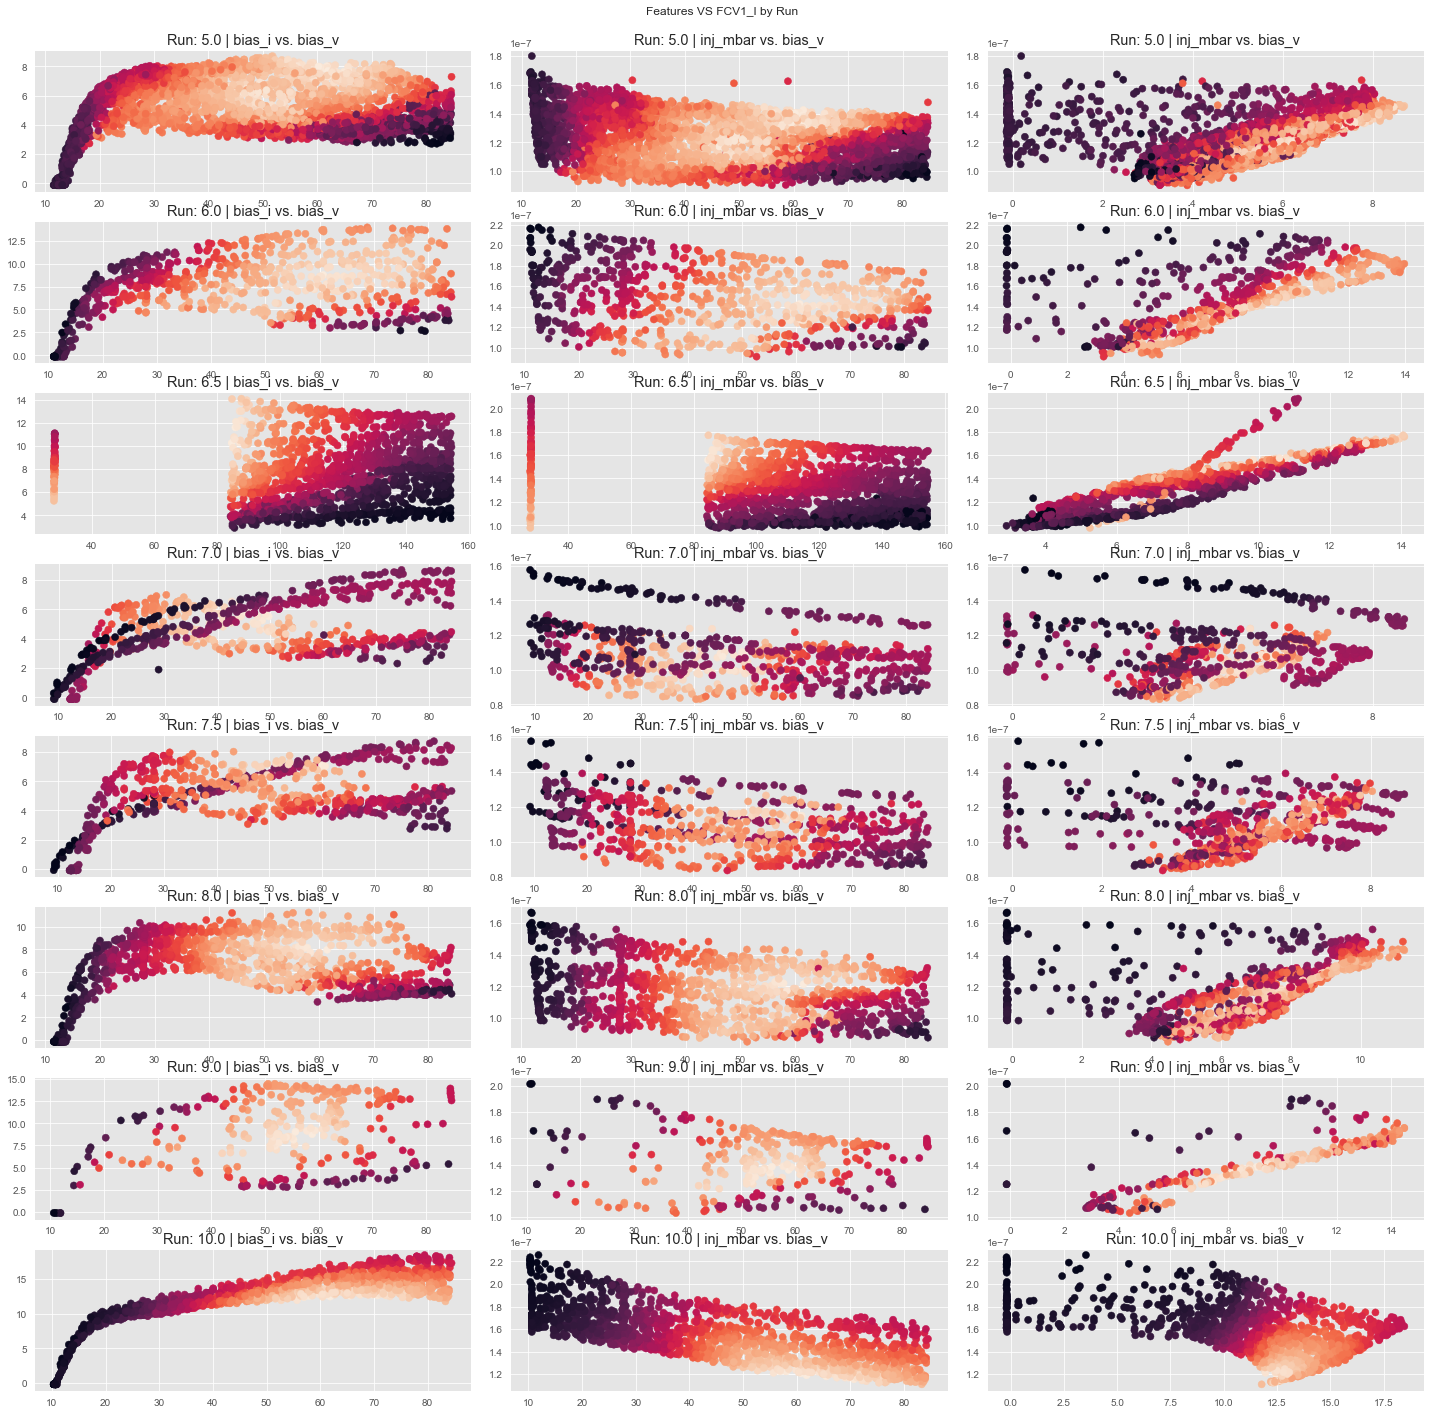

In [151]:
fig, axes= plt.subplots(8, 3, figsize=(20, 20))
fig.tight_layout()
for run_num, run in enumerate(tiny_df['run_id'].unique()):
    run_data = tiny_df[tiny_df['run_id'] == run]
    bias_v = run_data["bias_v_mean"]
    bias_i = run_data["bias_i_mean"]
    inj_mbar = run_data["inj_mbar_mean"]
    fcv1_i = run_data["fcv1_i_mean"]
    axes[run_num, 0].scatter(bias_v, bias_i, s=50, c=fcv1_i)
    axes[run_num, 0].title.set_text(f"Run: {run} | bias_i vs. bias_v")
    axes[run_num, 1].scatter(bias_v, inj_mbar, s=50, c=fcv1_i)
    axes[run_num, 1].title.set_text(f"Run: {run} | inj_mbar vs. bias_v")
    axes[run_num, 2].scatter(bias_i, inj_mbar, s=50, c=fcv1_i)
    axes[run_num, 2].title.set_text(f"Run: {run} | inj_mbar vs. bias_v")
fig.suptitle("Features VS FCV1_I by Run")
fig.subplots_adjust(top=0.95)
plt.show()

### Comparing data ranges between runs

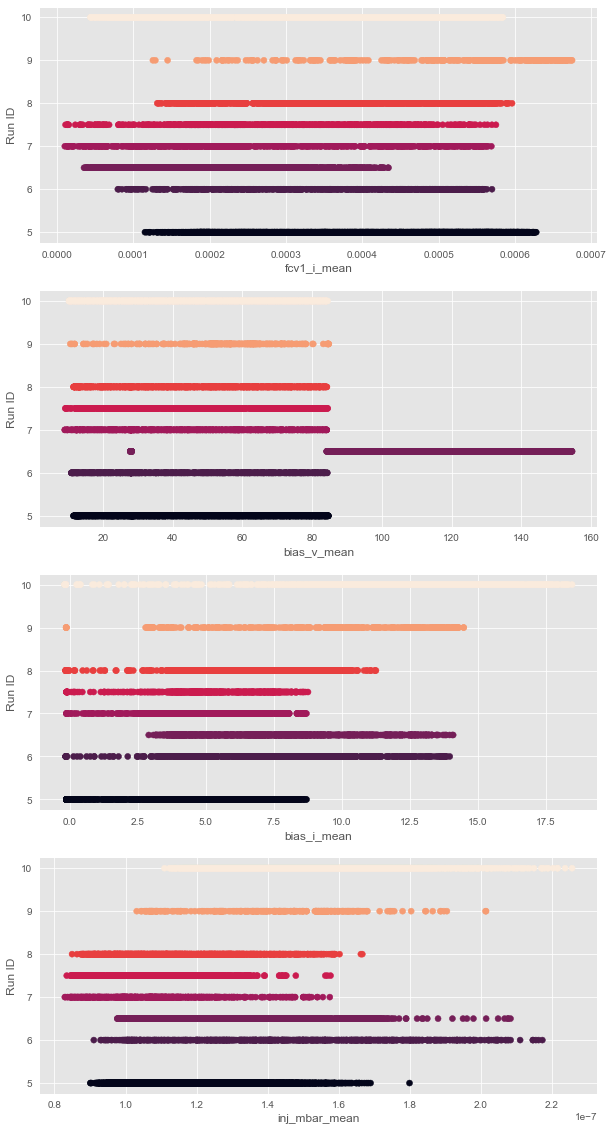

In [152]:
fig, axes = plt.subplots(4, 1, figsize=(10, 20))
for i, feature in enumerate(features):
    feature_data = tiny_df[feature]
    axes[i].scatter(feature_data, tiny_df["run_id"], c=tiny_df["run_id"])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Run ID")

In [153]:
print(*tiny_df["run_id"].unique(), sep=", ")

5.0, 6.0, 6.5, 7.0, 7.5, 8.0, 9.0, 10.0


# Full Dataset Feature Importance via RandomForestRegressor
Just to see, better to go run by run b/c of tuning between runs. Uses values generated by sklearn RandomForestRegressor, aka Gini importance

In [171]:
target = df["fcv1_i_mean"]
dropped = df.drop(["fcv1_i_mean", "start_time", "stop_time", "run_id", "time_mean", "time_std", "unix_epoch_milliseconds_mean", "unix_epoch_milliseconds_std"],axis=1)
not_mean = lambda string: string.find("_std") < 0
feature_means = dropped[filter(not_mean, dropped.columns)]

In [172]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
model = RandomForestRegressor(random_state=1931)
_ = model.fit(feature_means, target)

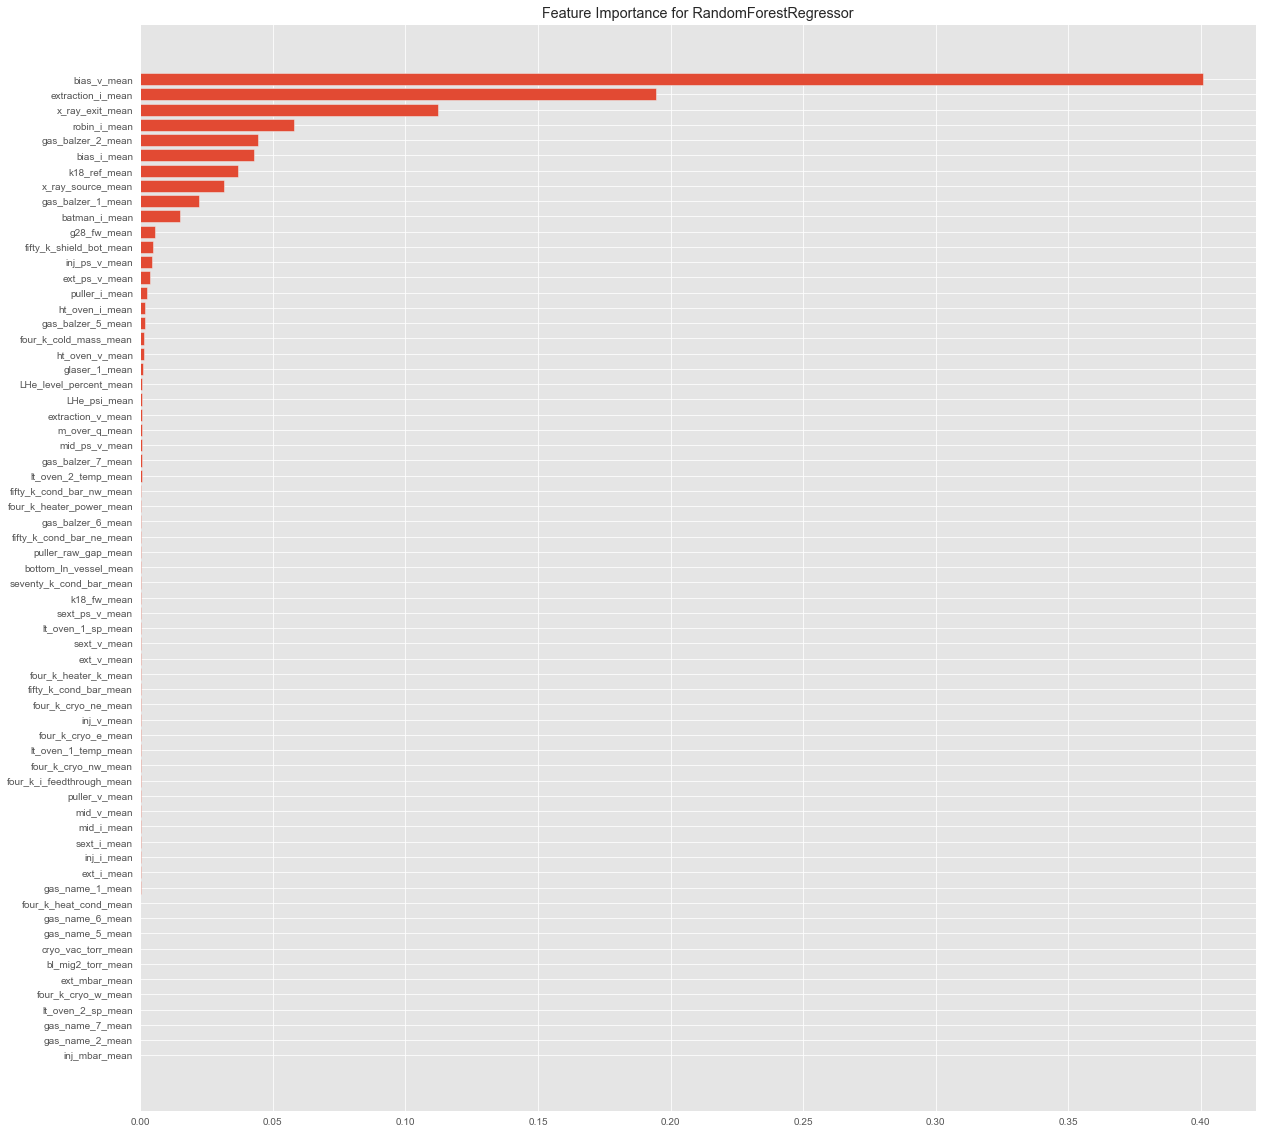

In [173]:
importances = model.feature_importances_
sorted_idx = np.argsort(importances)
padding = np.arange(len(sorted_idx)) + 0.5
plt.figure(figsize=(20, 20))
plt.barh(padding, importances[sorted_idx])
plt.yticks(padding, feature_means.columns[sorted_idx])
plt.title("Feature Importance for RandomForestRegressor")
plt.show()

In [174]:
for i, f in enumerate(feature_means.columns[sorted_idx[::-1]][:10]):
    print(i+1, f)

1 bias_v_mean
2 extraction_i_mean
3 x_ray_exit_mean
4 robin_i_mean
5 gas_balzer_2_mean
6 bias_i_mean
7 k18_ref_mean
8 x_ray_source_mean
9 gas_balzer_1_mean
10 batman_i_mean


Calculating permuation importances, more resistant to "high cardinality features", i.e. if certain settings are drastically altered between runs
https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance

In [175]:
perm_importances = permutation_importance(model, feature_means, target, n_repeats=10)

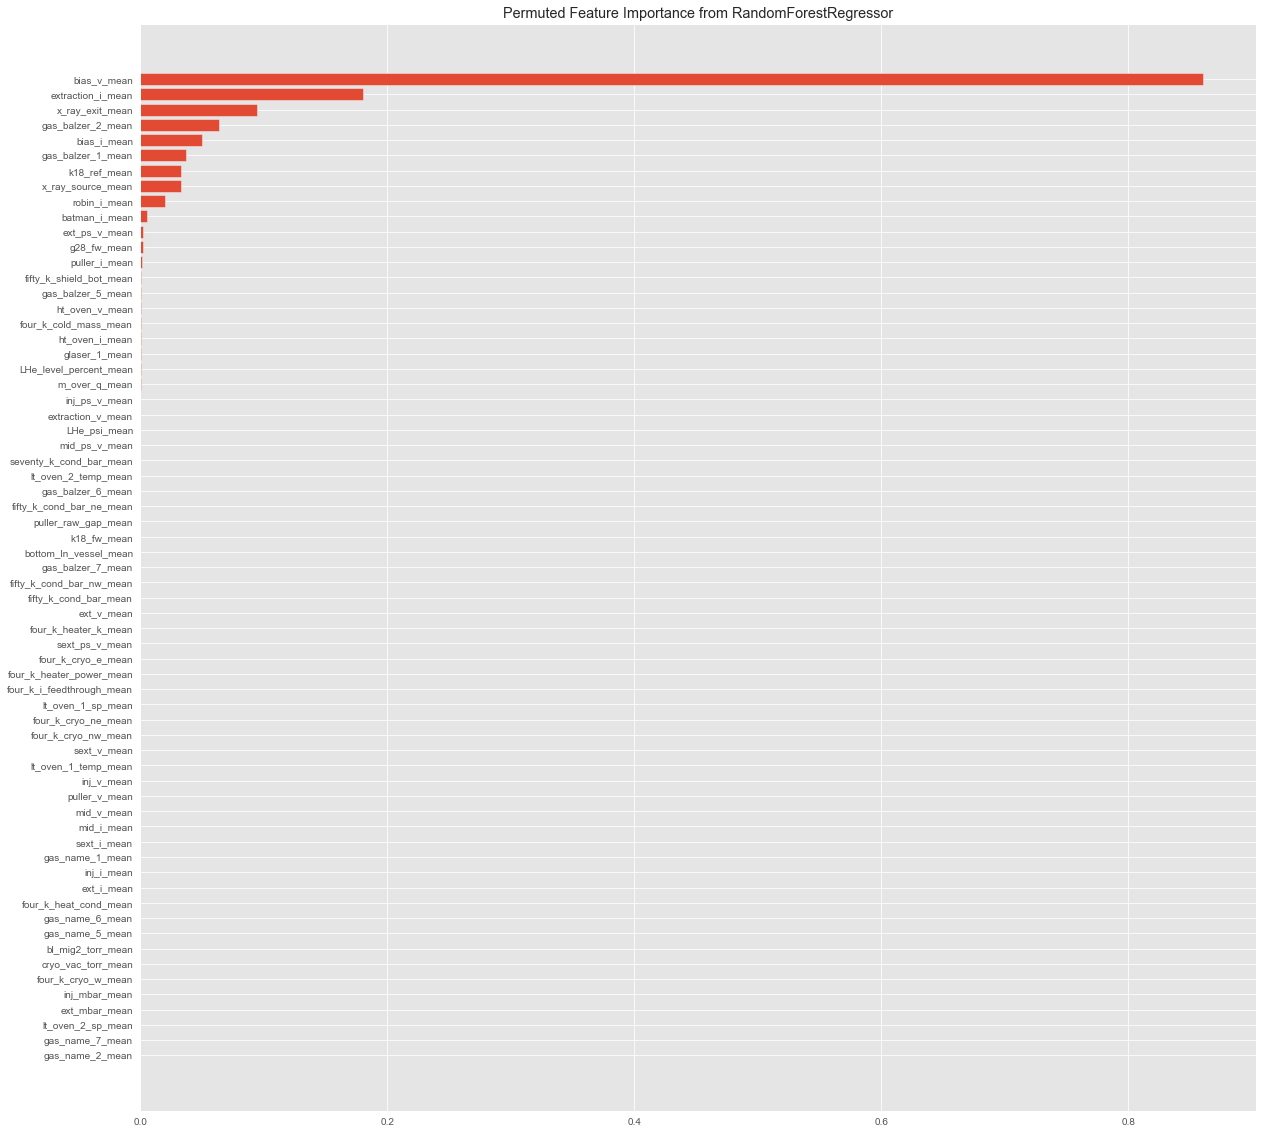

In [176]:
importances = perm_importances.importances_mean
sorted_idx = np.argsort(importances)
padding = np.arange(len(sorted_idx)) + 0.5
plt.figure(figsize=(20, 20))
plt.barh(padding, importances[sorted_idx])
plt.yticks(padding, feature_means.columns[sorted_idx])
plt.title("Permuted Feature Importance from RandomForestRegressor")
plt.show()

In [177]:
for i, f in enumerate(feature_means.columns[sorted_idx[::-1]][:10]):
    print(i+1, f)

1 bias_v_mean
2 extraction_i_mean
3 x_ray_exit_mean
4 gas_balzer_2_mean
5 bias_i_mean
6 gas_balzer_1_mean
7 k18_ref_mean
8 x_ray_source_mean
9 robin_i_mean
10 batman_i_mean


# Run Feature Importance via RandomForestRegressor

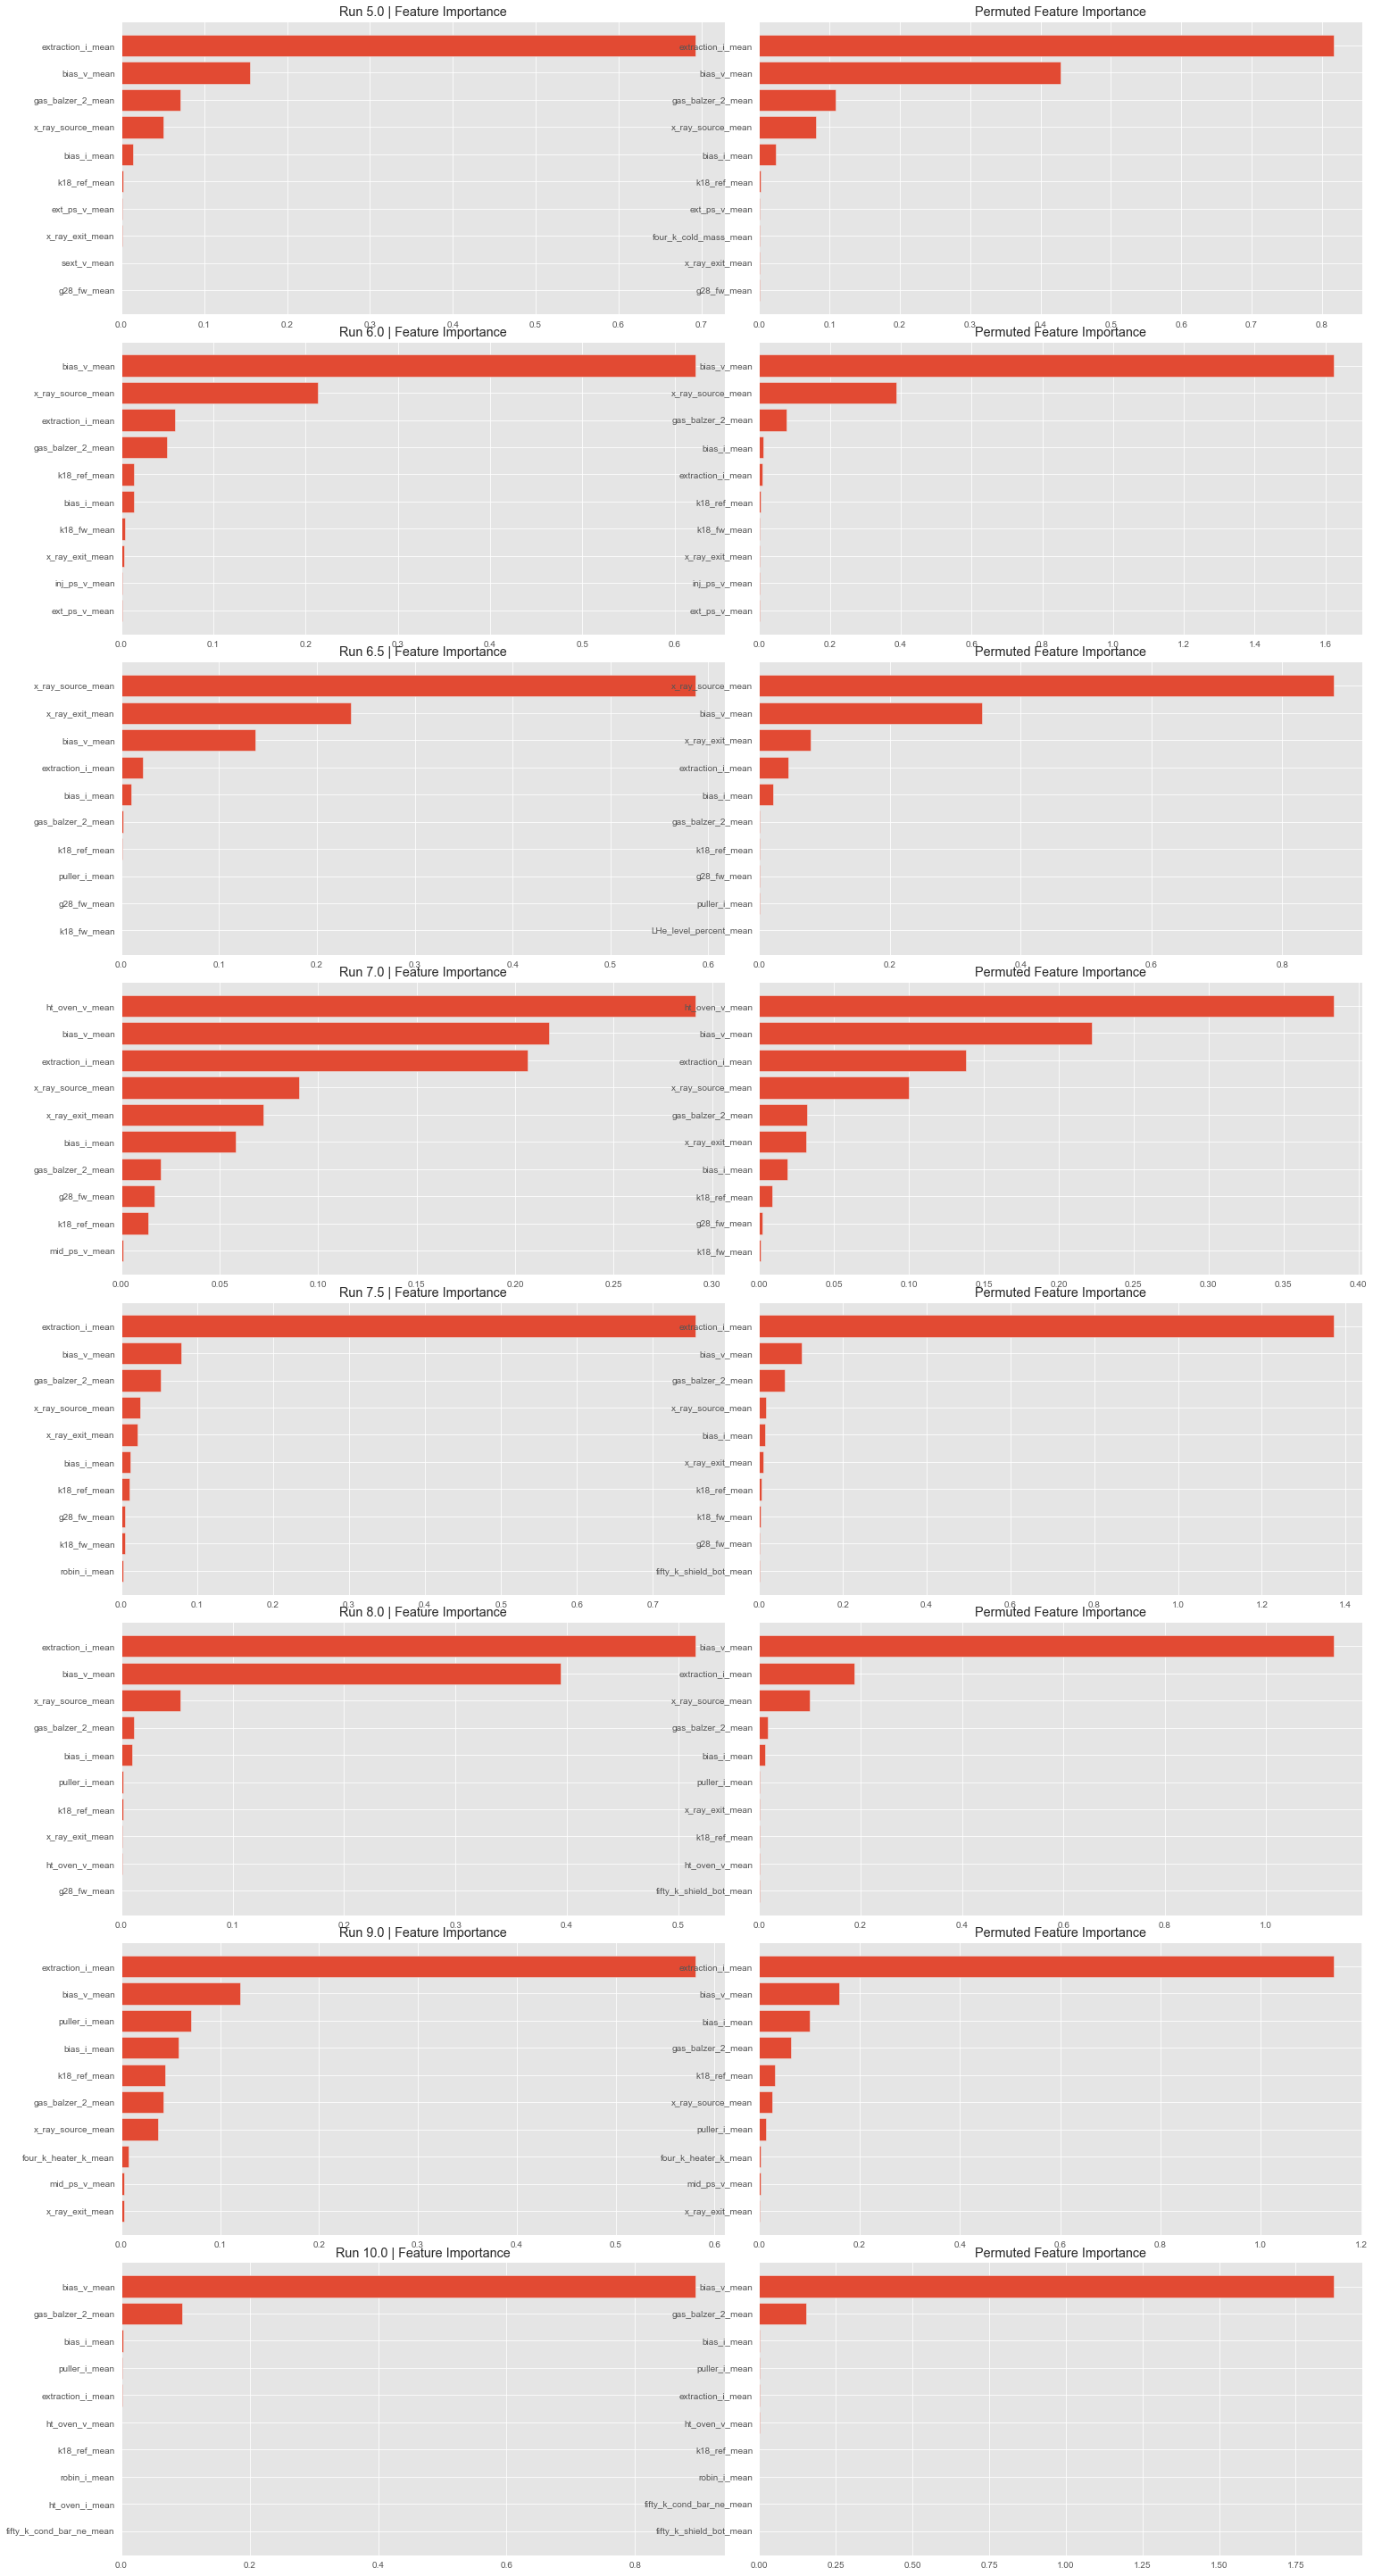

In [161]:
top_k = 10
fig, axes = plt.subplots(8, 2, figsize=(20,40))
fig.tight_layout()
for i, run in enumerate(df['run_id'].unique()):
    run_data = df[df['run_id'] == run]
    targets = run_data['fcv1_i_mean']
    features = run_data.drop(["fcv1_i_mean", "start_time", "stop_time", "run_id", "time_mean", "time_std", "unix_epoch_milliseconds_mean", "unix_epoch_milliseconds_std"],axis=1)
    features = features[filter(not_mean, dropped.columns)]

    model = RandomForestRegressor(random_state=1931)
    model.fit(features, targets)
    pairs = list(zip(features,model.feature_importances_))
    pairs.sort(key = lambda x : x[1])
    pairs = pairs[-top_k:]
    axes[i, 0].barh([x[0] for x in pairs], [x[1] for x in pairs])
    axes[i, 0].title.set_text(f"Run {run} | Feature Importance")

    perm_importances = permutation_importance(model, features, targets)
    pairs = list(zip(features, perm_importances.importances_mean))
    pairs.sort(key = lambda x : x[1])
    pairs = pairs[-top_k:]
    axes[i, 1].barh([x[0] for x in pairs], [x[1] for x in pairs])
    axes[i, 1].title.set_text(f"Permuted Feature Importance")


plt.show()

The most important features seem to switch around depending on the run, with bias_v and extraction_i consistently n of the most important features according to the random forest. The importance is just a value associated with how well that feature helped the random forest make its splits more pure, so it doesn't fully represent what features cause a certain beam current, only what helped this model predict it.

### Questions:
1. Explanation of the time data (unix epoch, start/stop, mean/std)
2. What models Wenhan used (looking over his repo | continuous vs. discrete)
3. Permissions for github

### Next Steps
1. Clone Wenhan's repo (I think might need to do some parts from scratch i.e. dataset / loader)